<a href="https://colab.research.google.com/github/upinder-sangha/Word2vec/blob/main/word_to_vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries


In [ ]:
import numpy as np
import pandas as pd

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#tools for removing noise
import re
import string

# Importing the dataset
reference - https://www.youtube.com/watch?v=tGw-ZACouik&list=WL&index=38&ab_channel=AhladKumar

####Install Kaggle

In [ ]:
!pip install kaggle

####Create a new API tokken from your kaggle account and then upload the kaggle.json file recieved from kaggle by running the following code

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanghaupinder","key":"d88a482e2530c00bf775f5a61fb254ac"}'}

####Create a new directory named 'kaggle' in google colab and copy the kaggle.json file to that directory and change the permissions

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

#change th permission
!chmod 600 ~/.kaggle/kaggle.json

####Download the dataset into google colab


In [ ]:
!kaggle datasets download -d nltkdata/brown-corpus

 54% 5.00M/9.29M [00:02<00:01, 2.50MB/s]
100% 9.29M/9.29M [00:02<00:00, 4.59MB/s]


####Unzip the dataset folder

In [ ]:
from zipfile import ZipFile
file_name = "brown-corpus.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('done')

done


#Reading the dataset

In [ ]:
dataset = pd.read_csv('brown.csv',names=['filename', 'para_id', 'sent_id', 'raw_text', 'text', 'pos','label'],encoding='latin-1')
text = dataset['text'][1:].to_numpy()
from sklearn.utils import shuffle
text = shuffle(text, random_state=0)
size=500
text = text[:size]

In [ ]:
print(text[:10])


["The Istiqlal-sponsored U.M.C.I.A. ( L'Union Marocaine Des Commercants , Industrialistes et Artisans ) was opposed by candidates of the new U.N.F.P. ( L'Union National Des Forces Populaires ) in nearly all urban centers ."
 "A woman had it or she didn't ."
 "They're glued and screwed to the inner member of the keelson ."
 'hollyhock blossoms that , turned upside down , make pink-petticoated ladies ; ;'
 'Basic design of a fiber-coupled , double-stage image intensifier'
 'From International Airport in Los Angeles to International Airport in Houston , as the great four-jet Boeing 707 flies , is a routine five hours and 25 minutes , including stopovers at Phoenix , El Paso , and San Antonio .'
 "I'm a stranger in paradise '' ."
 'but Charlie knew what was wrong with him and knew , too , that there was no pill to cure it .'
 'There were aesthetic problems as well as political .'
 'In Fig. 7-4 , the input axis of the three-axis platform is shown at some point on the earth .']


#Preprocessing the corpus

In [ ]:
def clean_text(texts):
    cleaned_corpus = []
    for text in texts:
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', ' ', text)
        text = re.sub('\w*\d\w*', '', text)
        # text = text.strip()
        text = re.sub(' +', ' ', text) 
        cleaned_corpus.append(text)
    return (cleaned_corpus)

In [ ]:
cleaned_text = clean_text(text)
print(cleaned_text[:10])

['the istiqlalsponsored umcia lunion marocaine des commercants industrialistes et artisans was opposed by candidates of the new unfp lunion national des forces populaires in nearly all urban centers ', 'a woman had it or she didnt ', 'theyre glued and screwed to the inner member of the keelson ', 'hollyhock blossoms that turned upside down make pinkpetticoated ladies ', 'basic design of a fibercoupled doublestage image intensifier', 'from international airport in los angeles to international airport in houston as the great fourjet boeing flies is a routine five hours and minutes including stopovers at phoenix el paso and san antonio ', 'im a stranger in paradise ', 'but charlie knew what was wrong with him and knew too that there was no pill to cure it ', 'there were aesthetic problems as well as political ', 'in fig the input axis of the threeaxis platform is shown at some point on the earth ']


#Creating word_to_int and int_to_word dictionaries

In [ ]:
corpus=" ".join(cleaned_text)
words = []
for word in corpus.split():
    # if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [ ]:
print(word2int)
print(int2word)

{'symphony': 0, 'would': 1, 'august': 2, 'full': 3, 'ideas': 4, 'sports': 5, 'expression': 6, 'were': 7, 'buff': 8, 'might': 9, 'considerable': 10, 'almost': 11, 'flourished': 12, 'invaluable': 13, 'buildings': 14, 'cemetery': 15, 'pale': 16, 'stood': 17, 'pelting': 18, 'spring': 19, 'tapering': 20, 'decree': 21, 'mud': 22, 'golden': 23, 'bob': 24, 'mean': 25, 'christ': 26, 'quite': 27, 'fell': 28, 'compiled': 29, 'wieland': 30, 'straw': 31, 'neighborhoods': 32, 'industrial': 33, 'response': 34, 'doing': 35, 'future': 36, 'stranger': 37, 'appointee': 38, 'snatched': 39, 'doubting': 40, 'interclass': 41, 'structures': 42, 'still': 43, 'pocket': 44, 'second': 45, 'growing': 46, 'laura': 47, 'best': 48, 'sixteen': 49, 'worryin': 50, 'divine': 51, 'distant': 52, 'odwyer': 53, 'acknowledged': 54, 'things': 55, 'shakespeare': 56, 'tannhaeuser': 57, 'saxons': 58, 'endorse': 59, 'quality': 60, 'those': 61, 'muscles': 62, 'governor': 63, 'downgraded': 64, 'tax': 65, 'personnel': 66, 'tended': 6

#Tokenizing the sentences

In [ ]:
split_sentences = []
for sentence in cleaned_text:
    split_sentences.append(sentence.split())


In [ ]:
print(split_sentences[:10])

[['the', 'istiqlalsponsored', 'umcia', 'lunion', 'marocaine', 'des', 'commercants', 'industrialistes', 'et', 'artisans', 'was', 'opposed', 'by', 'candidates', 'of', 'the', 'new', 'unfp', 'lunion', 'national', 'des', 'forces', 'populaires', 'in', 'nearly', 'all', 'urban', 'centers'], ['a', 'woman', 'had', 'it', 'or', 'she', 'didnt'], ['theyre', 'glued', 'and', 'screwed', 'to', 'the', 'inner', 'member', 'of', 'the', 'keelson'], ['hollyhock', 'blossoms', 'that', 'turned', 'upside', 'down', 'make', 'pinkpetticoated', 'ladies'], ['basic', 'design', 'of', 'a', 'fibercoupled', 'doublestage', 'image', 'intensifier'], ['from', 'international', 'airport', 'in', 'los', 'angeles', 'to', 'international', 'airport', 'in', 'houston', 'as', 'the', 'great', 'fourjet', 'boeing', 'flies', 'is', 'a', 'routine', 'five', 'hours', 'and', 'minutes', 'including', 'stopovers', 'at', 'phoenix', 'el', 'paso', 'and', 'san', 'antonio'], ['im', 'a', 'stranger', 'in', 'paradise'], ['but', 'charlie', 'knew', 'what', '

#Creating the context_word-center_word pairs

In [ ]:
data = []
WINDOW_SIZE = 3
for sentence in split_sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [ ]:
print(data[:10])

[['the', 'istiqlalsponsored'], ['the', 'umcia'], ['the', 'lunion'], ['istiqlalsponsored', 'the'], ['istiqlalsponsored', 'umcia'], ['istiqlalsponsored', 'lunion'], ['istiqlalsponsored', 'marocaine'], ['umcia', 'the'], ['umcia', 'istiqlalsponsored'], ['umcia', 'lunion']]


#One hot encoding the words

In [ ]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
  temp = np.zeros(vocab_size)
  temp[data_point_index] = 1
  return temp

x_train = [] # input word
y_train = [] # output word

for data_word in data:
  x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
  y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [ ]:
print(x_train[1])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(x_train.shape, y_train.shape)

(46220, 3177) (46220, 3177)


#Creating the neural network with one hidden layer

In [ ]:
embedding_size = 50
batch_size = 64
n_batches = int(len(x_train)/batch_size)
learning_rate= 0.001
x = tf.placeholder(tf.float32,shape = (None,vocab_size))
y = tf.placeholder(tf.float32,shape = (None,vocab_size))
w1 = tf.Variable(tf.random_normal([vocab_size,embedding_size]),dtype = tf.float32)
b1 = tf.Variable(tf.random_normal([embedding_size]),dtype = tf.float32)
w2 = tf.Variable(tf.random_normal([embedding_size,vocab_size]),dtype = tf.float32)
b2 = tf.Variable(tf.random_normal([vocab_size]),dtype = tf.float32)
hidden_y = tf.matmul(x,w1) + b1
_y = tf.matmul(hidden_y,w2) + b2
#print(b.dtype)
#_y = tf.matmul(x,w)
cost = tf.reduce_mean(tf.losses.mean_squared_error(_y,y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
print(y.shape)
print(_y.shape)
init = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()
saver = tf.train.Saver()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.33)
sess = tf.Session(config = tf.ConfigProto(gpu_options = gpu_options))
sess.run(init)

(?, 3177)
(?, 3177)


#Training our network on the input-output pairs to get embeddings

In [ ]:
for epoch in range(50):
    avg_cost = 0
    for i in range(n_batches-1):
        batch_x = x_train[i*batch_size:(i+1)*batch_size]
        batch_y = y_train[i*batch_size:(i+1)*batch_size]
        #print(batch_x.shape)
        _,c = sess.run([optimizer,cost],feed_dict = {x:batch_x,y:batch_y})
        #print(test.shape)
        avg_cost += c/n_batches
    print('Epoch',epoch,' - ',avg_cost)
save_path = saver.save(sess,'/home/tempword2vec_weights_all.ckpt')

Epoch 0  -  47.769182337287916
Epoch 1  -  22.042354083127275
Epoch 2  -  13.299524458491572
Epoch 3  -  8.052649576247896
Epoch 4  -  4.787411723440702
Epoch 5  -  2.755512852417795
Epoch 6  -  1.5189686869155026
Epoch 7  -  0.7957403893038175
Epoch 8  -  0.3945512857463556
Epoch 9  -  0.18553864634969894
Epoch 10  -  0.08381504088464778
Epoch 11  -  0.0374428605469888
Epoch 12  -  0.01732739092333246
Epoch 13  -  0.008748998673609527
Epoch 14  -  0.00497623644008138
Epoch 15  -  0.0031697831537130794
Epoch 16  -  0.002194421252868156
Epoch 17  -  0.0016066788153502307
Epoch 18  -  0.0012257496173409075
Epoch 19  -  0.0009702893646873821
Epoch 20  -  0.0007965859930515361
Epoch 21  -  0.0006771880509802639
Epoch 22  -  0.000594707548284872
Epoch 23  -  0.0005372491598431116
Epoch 24  -  0.0004968951166661615
Epoch 25  -  0.0004683292737402213
Epoch 26  -  0.00044768412961557457
Epoch 27  -  0.0004323784557333699
Epoch 28  -  0.0004205614210034196
Epoch 29  -  0.00041096413316504403
Ep

#Printing the embeddings

In [ ]:
print(sess.run(w1[0]))
print('----------')
print(sess.run(b1[0]))
print('----------')

[-0.9375105   1.5041969  -0.6245604  -0.51665455 -0.08913588  0.8667135
  1.3787335   0.293181    1.0279394  -0.03265479 -0.06380582  0.526502
  0.5055457   0.69969136 -1.2950462  -0.6630092   0.9240536   0.24178478
  0.9149455   0.1335096  -0.16720025 -0.84019756  0.22179718 -0.12251161
 -0.666328   -1.1124594   0.31796724 -1.558532   -0.49690646  0.01211953
  0.44760928 -0.5252535  -0.89105743 -2.3404763  -0.40113413  0.62782294
 -1.1938452   0.32555887 -0.0727824   0.47456315 -0.66773057 -0.20784876
  0.25263527  0.19328605 -0.1715262  -0.16210155  0.6220154  -0.7382758
 -0.3751258   0.6725504 ]
----------
-0.032884236
----------


In [ ]:
vectors = sess.run(w1+b1)

In [ ]:
print(vectors[0])

[-0.97039473  1.5188142  -0.50930744 -0.70081425  0.12846205  0.91214764
  1.5005354   0.19910021  1.0118599   0.02193494 -0.18200022  0.47663745
  1.0593119   0.58667934 -1.215509   -0.7001562   0.92841667  0.18994965
  0.94291556  0.43783483 -0.09898245 -0.96980226  0.15209503 -0.08050547
 -0.67470807 -1.2210252   0.32701808 -1.4401191  -0.4968103   0.00671215
  0.4400177  -0.47698215 -1.051331   -2.3313673  -0.35611594  0.62430406
 -1.0799892   0.51014394 -0.17374316  0.41573802 -0.6779319   0.0393391
  0.3115211   0.4685002  -0.3331347  -0.2105265   0.58079684 -0.8234641
 -0.51923555  0.460307  ]


In [ ]:
print(vectors[ word2int['to'] ])

[-0.00573131  0.26425266 -0.16537766 -0.22380188  0.11018268  0.03958049
 -0.01334351 -0.0011433   0.05059301  0.15691018 -0.12173419 -0.04998824
  0.46891814 -0.155108    0.17562798 -0.16030414 -0.16514449 -0.21046086
  0.0213003  -0.17180526  0.09503338 -0.08483503 -0.15571916  0.15083042
 -0.04016521 -0.03024743  0.02164406 -0.06001023  0.14637499  0.15253209
 -0.0472916   0.276658   -0.03016008  0.002925    0.12191507  0.05460283
  0.20711404  0.13113692 -0.02897501 -0.15862496 -0.11898649  0.5512154
  0.15915126 -0.09073275 -0.07504571 -0.22049336 -0.020896   -0.06357521
  0.07314248 -0.00358605]


#Finding the closest words to the given the word

In [ ]:
embeddings = dict()
for i in range(vocab_size):
    temp_a = np.zeros([1,vocab_size])
    temp_a[0][i] = 1
    temp_emb = sess.run([_y],feed_dict = {x:temp_a})
    temp_emb = np.array(temp_emb)
    #print(temp_emb.shape)
    embeddings[int2word[i]] = temp_emb.reshape([vocab_size])
    #print(embeddings[i].shape)

In [ ]:
from scipy import spatial
from collections import OrderedDict
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def closest(word):
    distances = dict()
    for w in embeddings.keys():
        distances[w] = 1- spatial.distance.cosine(embeddings[w],embeddings[word])
    d_sorted = OrderedDict(sorted(distances.items(),key = lambda x:x[1] ,reverse = True))
    s_words = d_sorted.keys()
    print(s_words)

In [ ]:
print(closest('news'))

odict_keys(['news', 'dont', 'headlines', 'background', 'appian', 'lime', 'steeles', 'negro', 'equally', 'brazil', 'choices', 'remain', 'cracking', 'proprietorship', 'unique', 'mano', 'receiving', 'offer', 'nearly', 'col', 'sheep', 'seen', 'consistently', 'orlicks', 'variety', 'expressive', 'realism', 'cabin', 'arise', 'grew', 'start', 'possible', 'meet', 'nation', 'productive', 'watersheds', 'against', 'marsha', 'message', 'preparing', 'yesterday', 'glimco', 'sic', 'march', 'bodies', 'poetic', 'artie', 'calmness', 'society', 'stole', 'case', 'movements', 'grimly', 'walnuts', 'stuff', 'believe', 'obviously', 'material', 'poetry', 'becomes', 'nothing', 'bibleloving', 'orthography', 'confusion', 'final', 'convinced', 'specific', 'tentatively', 'enemy', 'eliotormartin', 'exercised', 'rising', 'steeple', 'greater', 'opinion', 'dishes', 'pore', 's', 'mask', 'revenues', 'magazines', 'sponsored', 'sit', 'through', 'practice', 'funeral', 'technology', 'transgressed', 'accounts', 'youre', 'cemet

#Visualizing on a 2 dimentional graph

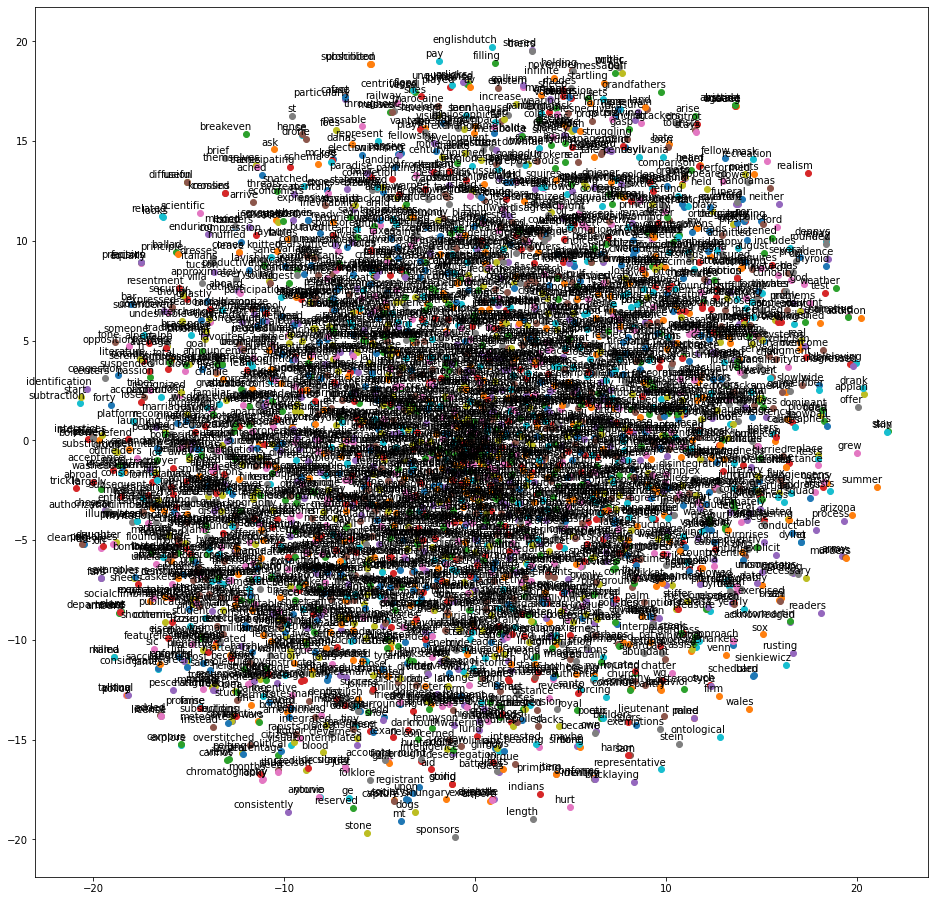

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
labels = []
tokens = []
for w in embeddings.keys():
    labels.append(w)
    tokens.append(embeddings[w])
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()